# Automatic and Adaptive  Quadrature

## Introducción


En los métodos tradicionales de integración numérica la longitud de los intervalos es constante. Al ir aumentando la cantidad de intervalos, la integración será más precisa pero probablemente sea menos eficiente computacionalmente. 


Con  el fin de aumentar la exactitud en la integración numérica se puede utilizar el método de automatic quadrature. Este método consiste en tomar intervalos con longitudes constantes, que disminuyan hasta lograr minimizar el error tanto como deseado. 

Con el método de adaptive quadrature no solo se disminuye el tamaño del intervalo, si el error no se logra minimizar es posible dividir la función en particiones dentro de las cuales se irá reduciendo el tamaño del intervalo hasta lograr minimizar el error. Si no se alcanza el error deseado en una de las particiones de la función, se repite el proceso hasta lograr minimizar el error tanto como se desea. 


Con este método adaptive se logra tener aproximaciones tan precisas como se requiera incluso con funciones con segmentos con gran variabilidad. 





Al calcular integrales numéricas con una computadora se habla de sumas finitas de Riemann a lo que nos referimos a partir del intervalo de integración de una función en $n$ subintervalos de longitud $h$ donde $h=\frac{b-a}{n}$ en donde en cada subintervalo se trata de aproximar el área debajo de la curva por medio de diferentes figuras, las clásicas son rectángulos y trapecios. 
Es de notar que si estas sumatorias fueran infinitas se obtendría la respuesta exacta de la integral, pero como esto no es posible en una computadora, las sumatorias se deben de truncar en $n$ subintervalos. Entre más intervalos, mejor exactitud tendra la aproximación de la integral.

Ahora que pasa cuando por ejemplo tenemos una funcion la cual contiene una parte que cambia muy drásticamente, en esta situación la integral necesita de  más intervalos para asi hacer casar las anteriormente mencionadas formas (rectangulos, trapecios) en espacios mas pequeños y de esta forma ajustar estos cambios en nuestra estimación. Dicho enfoque no está del todo mal, excepto que si por ejemplo la funcion contiene este comportamiento cambiante en una pequeña proporción de su dominio, entonces estaríamos sacrificando poder computacional calculando aproximaciones a subintervalos muy pequeños en donde la funcion y al no tener un comportamiento tan cambiante en la mayoria del dominio no valdria la pena tener tanto intervalos en esas areas.  Como solucion a este problema existe el enfoque Adaptive Quadrature, el cual intenta al final calcular numericamente la integral de una funcion igualmente por sumatoria finita de aproximaciones de areas bajo la curva de subintervalos, pero con la diferencia de que la longitud de cada intervalo $h$ sera variable a lo largo del intervalo de integración, por lo que algunos subintervalos de la función tendran menor longitud.

## Métodos

**Automatic quadrature**

El método de automatic quadrature consiste  en aumentar la cantidad subintervalos de longitud constante hasta lograr minimizar el error tanto como se requiera.

*Pseudocodigo*

Se recibe el intervalo de integracion $[a,b]$ y el numero $n$ de subintervalos iniciales.

funcion automatic(a,b,n)
1. Se evalua la aproximacion utilizando cualquiera de las funciones clasicas de aproximacion (rectangulo, trapecio, simpson). Ir paso 2.
2. Si el error de la aproximacion del paso 1 es muy alta. Ir paso 3 sino ir a paso 5.
3. Aumentar el numero de subintervalos en 1. Ir paso 4
4. retornar el llamado a la funcion "automatic" con el nuevo numero de subintervalos, osea $automatic(a,b,n)$.
5. Devolver aproximacion.

**Adaptive quadrature**

Este método consiste en aumentar la cantidad de subintervalos con longitud variable hasta lograr minimizar el error tanto como se quiera. 

Cada subintervalo debe de cumplir con minimizar el error, de lo contrario en ese subintervalo se aplicará el proceso nuevamente hasta alcanzar la meta. 

En cada intervalo $ [ai, bi] $ se intenta aproximar la integral de la forma: $$ \int_{ai}^{bi} f(x) dx $$

*Pseudocodigo*

Se recibe el intevalo de integracion $[a,b]$.

funcion adaptive(a,b);
1. Se evalua la aproximacion utilizando cualquira de las funciones clasicas de aproximacion (rectangulo, trapecio, simpson). Ir paso 2.
2. Si el error de la aproximacion del paso 1 es muy alta. Ir paso 3 sino ir a paso 5.
3. Encontrar el punto medio del intervalo dado por $m=\frac{a+b}{2}$. Ir paso 4.
4. Retornar la suma de llamar 2 veces nuevamente a la funcion "adaptive" pero con los nuevos limites de intervalos, osea $adaptive(a,m) + adaptive(m,b)$.
5. Devolver aproximacion.

Con este método se reduce el costo computacional ya que, en comparación con automatic quadrature, se divide en subintervalos solamente en aquellos intervalos donde sea necesario.

 La siguiente imagen muestra como se verian mas o menos el tamaño de los intervalos en una funcion.
![Adaptive](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/3fe658c9ad553b4f8a1a138048b955ee3fc5d68a/5-Figure7.9-1.png)

**Desventajas**

La mayor desventaja de estos métodos es que puede que nunca se alcance minimizar el error o que al dividir en subintervalos se pierdan los comportamientos interesantes de la función. Otra desventaja se presenta cuando las funciones tienen discontinuidades o singularidades (donde la integral se convierte infinita, pero sigue existiendo). 

## Aplicación


A continuacion se muestran las funciones que calculan las integrales de la funcion f(x) por distintos metodos. Todas las funciones reciben como parametro el punto a del intervalo, el punto b del intervalo y n que es el numero de subintervalos en los cuales se dividira el intervalo $[a.b]$. Entre las funciones se encuentran:
* Simpson: Esta funcion calcula la integral por medio de encontrar el area bajo de la curva de una funcion de grados dos, la cual se aproxima a la funcion original a integrarse en el dominio igual al intervalo 

* Rectangulo Abajo: Dicha funcion calcula la integral por medio de la sumatoria de n cantidad de rectangulos tomando que su altura esta dada por la evaluacion del primer valor de cada subintervalo en la funcion, entonces el area de un subintervalo esta dado por $area=(b-a)*f(a)$. 

* Rectangulo Arriba: Esta funcion calcula la integral al igual que la de Rectangulo Abajo con la direferencia que la altura de los rectangulos no los estamos obteniendo por evaluar la funcion en el primer valor del subintervalo, sino en el ultimo valor de cada subintervalo en la funcion, entonces el area de un subintervalo esta dado por $area=(b-a)*f(b)$. 

* Rectangulo Medio: Esta funcion calcula la integral al sumar el area de n cantidad de rectangulos tomando su altura como la evalucion del punto medio de cada subintervalo en la funcion f. Por ejemplo, si el intervalo es $[2,5]$ entonces su area esta dada por $area = (5-2)*f(\frac{5-2}{2})$

* Trapecio: Dicha funcion calcula la integral al sumar el area de n cantidad de trapecios. El area de cada trapecio esta dada por la siguiente formula.
$area=f(a*\frac{b-a}{n})+f(a+\frac{b-a}{n})$

In [0]:
# Adaptive  Quadrature

In [0]:
# importacion de librerias necesarias
import numpy as np
import math
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

def f(x):
  return(-x**3+x**2)

def simpson(a,b,n):
  h=((b-a)/n)
  y=0
  for i in range(1,n):
    if(i%2):
      y+=4*f(a+h*i)
    else:
      y+=2*f(a+h*i)
  return (y+f(a)+f(b))*h/3

def rectangulo_abajo(a,b,n):
  h=((b-a)/n)
  y=0
  for i in range(n):
    y+=h*f(a+h*i)
  return y
def rectangulo_arriba(a,b,n):
  h=((b-a)/n)
  y=0
  for i in range(n):
    y+=h*f(a+h*(i+1))
  return y
def rectangulo_medio(a,b,n):
  h=((b-a)/n)
  y=0
  for i in range(n):
    y+=h*f(a+h*i+(h/2))
  return y


def trapecio(a,b,n):
  h=((b-a)/n)
  y=0
  for i in range(n):
    y+=f(a+(i+1)*h)+f(a+h*i)
  return y*h/2

Ahora ya que se tiene conocimiento de las funciones para el calculo de los diferentes metodos de integracion, pasamos a conocer los algoritmos en codigo que hacen uso de estas funciones para calcular el valor numerico de una integral definida.

### Automatic


In [0]:
def automatic(a,b,e, n):
  aprox=trapecio(a,b,n) 
  aprox2=rectangulo_medio(a,b,n)
  m= n+1 
  if(abs(aprox2-aprox) >= e):
    return (automatic(a,b,e,m)) 
  else: 
    return aprox2,n 

t1 = datetime.now()
res=automatic(0,1,0.000001, 1)
t2 = datetime.now()
t3 = t2 - t1
print("microsegundos: ",t3.microseconds)

print("Aproximacion: ",res[0],", numero de subintervalos: ",res[1])

microsegundos:  92452
Aproximacion:  0.08333366582612489 , numero de subintervalos:  354


### Adaptive

In [0]:
puntos=[] 
def adaptive(a,b,real):
  aprox=trapecio(a,b,1) 
  aprox2=rectangulo_medio(a,b,1)
  m=(b+a)/2 
  if(m<=a or m>=b): 
    return aprox2
  if(real+(aprox2-aprox)>real): 
    return (adaptive(a,m,real)+adaptive(m,b,real)) 
  else: 
    puntos.append(m) 
    return aprox2  

  
t1 = datetime.now()
res=adaptive(0,1,0.083333)
t2 = datetime.now()
t3 = t2 - t1
print("microsegundos: ",t3.microseconds)
print(" Aproximacion: ",res,", numero de subintervalos: ",len(puntos))

microsegundos:  465626
 Aproximacion:  0.08072916666685614 , numero de subintervalos:  262145


### Adaptive 2

Este segundo algoritmo es muy parecido al anterior, unicamente con la diferencia que no utilizamos dos de las funciones para calcular las integrales, solo se hace uso de una y la tolerancia que determina cuando parar de dividir los intervalos no esta definida por la precision de la computadora, sino por la diferencia que hay entre el valor de la integral en el intervalo actual y el valor de la sumatoria de las integrales si partieramos el intervalo en 2. Por lo que se puede controlar ese nivel de tolerancia y asi en menos subintervalos encontrar una respuesta buena.

In [0]:
puntos=[] # lista que contiene los puntos de los limites de subintervalos
def adaptive2(a,b):
  aprox=trapecio(a,b,1) 
  m=(b+a)/2 
  aprox2=trapecio(a,b,2) 
  if(m<=a or m>=b): 
    return aprox2
 
  if((abs(aprox2-aprox))>0.000001):    
    puntos.append(m) 
    return(adaptive2(a,m)+adaptive2(m,b)) 
  else:
    return aprox 
  
t1 = datetime.now()
res=adaptive2(0,1)
t2 = datetime.now()
t3 = t2 - t1
print("microsegundos: ",t3.microseconds)

print(" Aproximacion: ",res,", numero de subintervalos: ",len(puntos))

microsegundos:  626
 Aproximacion:  0.08331233263015747 , numero de subintervalos:  57


## Ejemplos

### $f(x)=e^{x}$  $de$  $[0,2[$

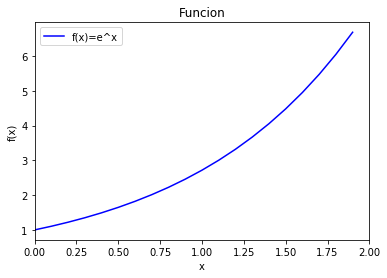

microsegundos:  71573
 Aproximacion:  6.389056136241436 , numero de subintervalos:  10635


In [0]:
def f(x):
  return(math.exp(x))
dominio=np.arange(0,2,0.1)
rango=[f(x) for x in dominio]
fig1 = plt.figure()
axe = fig1.add_subplot(1, 1, 1)
axe.plot(dominio, rango, 'b', label='f(x)=e^x')

axe.set_xlim([0, 2])
# axe.set_ylim([0, 0.0001])

axe.legend()
plt.ylabel("f(x)")
plt.xlabel("x")
plt.title("Funcion")
plt.show()


t1 = datetime.now()
res=adaptive2(0,2)
t2 = datetime.now()
t3 = t2 - t1
print("microsegundos: ",t3.microseconds)

print(" Aproximacion: ",res,", numero de subintervalos: ",len(puntos))

### $f(x)=tan(x)$ $de$ $[0,6]$

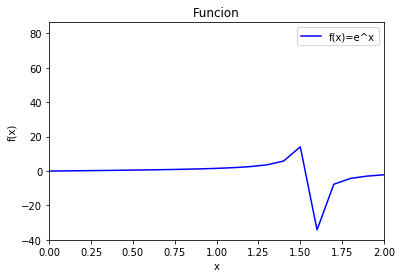

KeyboardInterrupt: ignored

In [0]:
def f(x):
  return(math.tan(x))
dominio=np.arange(0,6,0.1)
rango=[f(x) for x in dominio]
fig1 = plt.figure()
axe = fig1.add_subplot(1, 1, 1)
axe.plot(dominio, rango, 'b', label='f(x)=e^x')

axe.set_xlim([0, 2])
# axe.set_ylim([0, 0.0001])

axe.legend()
plt.ylabel("f(x)")
plt.xlabel("x")
plt.title("Funcion")
plt.show()


t1 = datetime.now()
res=adaptive2(0,6)
t2 = datetime.now()
t3 = t2 - t1
print("microsegundos: ",t3.microseconds)

print(" Aproximacion: ",res,", numero de subintervalos: ",len(puntos))

## Conclusiones

* El método automático, a diferencia de otros, requiere más trabajo para poder llegar a un resultado.
* Adaptive cuadrature utiliza intervalos de diferentes tamaños para obtener un resultado en menor tiempo.
* Si la tolerancia es demasiado estricta en relacion con la precision de la maquina "Adaptive Cuadrature" al tratar de encontrar una solucion gastara un gran numero de evaluacion de funciones y sera incapaz de encontrar un resultado.
* El metodo "Adaptive Quadrature" puede ser bastante ineficiente cuando la integral tiene disontinuidad en algun subintervalo.


## Referencias



*   Scientific Computing. *Michael Heath.*  (1997). University of Illinois. 
*  Adaptive and Automatic quadrature. *Jim Lambers*.https://www.math.usm.edu/lambers/mat460/fall09/lecture30.pdf
*   Adaptive Quadrature. http://www.cs.cornell.edu/courses/cs4210/2015fa/CVLBook/CVL4.PDF

